- Import the create_engine() function from sqlalchemy.
- Use create_engine() to make a database engine for data.db.
- Run the last line of code to show the names of the tables in the database.

In [1]:
# Import sqlalchemy's create_engine() function
from sqlalchemy import create_engine

# Create the database engine
engine = create_engine("sqlite:///data.db")

# View the tables in the database
print(engine.table_names())

['boro_census', 'hpd311calls', 'weather']


C:\Users\88016\AppData\Local\Temp/ipykernel_31668/2221785995.py:8: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


- Use read_sql() to load the hpd311calls table by name, without any SQL.

In [5]:
# Load libraries
import pandas as pd
from sqlalchemy import create_engine

# Create the database engine
engine = create_engine('sqlite:///data.db')

# Load hpd311calls without any SQL
hpd_calls = pd.read_sql("hpd311calls", engine)

# View the first few rows of data
print(hpd_calls.head())

  unique_key created_date agency  complaint_type incident_zip  \
0   38070822   01/01/2018    HPD  HEAT/HOT WATER        10468   
1   38065299   01/01/2018    HPD        PLUMBING        10003   
2   38066653   01/01/2018    HPD  HEAT/HOT WATER        10452   
3   38070264   01/01/2018    HPD  HEAT/HOT WATER        10032   
4   38072466   01/01/2018    HPD  HEAT/HOT WATER        11213   

       incident_address community_board    borough  
0    2786 JEROME AVENUE        07 BRONX      BRONX  
1  323 EAST   12 STREET    03 MANHATTAN  MANHATTAN  
2  1235 GRAND CONCOURSE        04 BRONX      BRONX  
3  656 WEST  171 STREET    12 MANHATTAN  MANHATTAN  
4       1030 PARK PLACE     08 BROOKLYN   BROOKLYN  


- Use read_sql() and a SELECT * ... SQL query to load the entire weather table.

In [4]:
# Create the database engine
engine = create_engine("sqlite:///data.db")

# Create a SQL query to load the entire weather table
query = """
SELECT * 
  FROM weather;
"""

# Load weather with the SQL query
weather = pd.read_sql(query, engine)

# View the first few rows of data
print(weather.head())

       station                         name  latitude  longitude  elevation  \
0  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
1  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
2  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
3  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
4  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   

         date     month  awnd  prcp  snow tavg  tmax  tmin  
0  12/01/2017  December  5.37  0.00   0.0         52    42  
1  12/02/2017  December  3.13  0.00   0.0         48    39  
2  12/03/2017  December  2.01  0.00   0.0         48    42  
3  12/04/2017  December  3.58  0.00   0.0         51    40  
4  12/05/2017  December  6.71  0.75   0.0         61    50  


- Create a database engine for data.db.
- Write a SQL query that SELECTs the date, tmax, and tmin columns from the weather table.
- Make a dataframe by passing the query and engine to read_sql() and assign the resulting dataframe to temperatures.

In [6]:
# Create database engine for data.db
engine = create_engine("sqlite:///data.db")

# Write query to get date, tmax, and tmin from weather
query = """
SELECT date, 
       tmax, 
       tmin
  FROM weather;
"""

# Make a dataframe by passing query and engine to read_sql()
temperatures = pd.read_sql(query,engine)

# View the resulting dataframe
print(temperatures)

           date  tmax  tmin
0    12/01/2017    52    42
1    12/02/2017    48    39
2    12/03/2017    48    42
3    12/04/2017    51    40
4    12/05/2017    61    50
..          ...   ...   ...
116  03/27/2018    47    34
117  03/28/2018    52    38
118  03/29/2018    53    49
119  03/30/2018    62    44
120  03/31/2018    58    39

[121 rows x 3 columns]


- Create a query that selects all columns of records in hpd311calls that have 'SAFETY' as their complaint_type.
- Use read_sql() to query the database and assign the result to the variable safety_calls.
- Run the last section of code to create a graph of safety call counts in each borough.

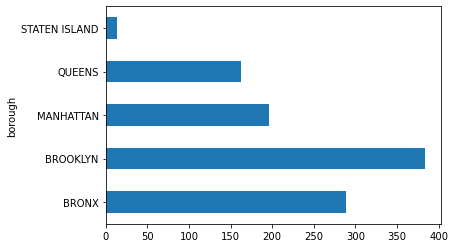

In [7]:
import matplotlib.pyplot as plt

# Create query to get hpd311calls records about safety
query = """
SELECT *
FROM hpd311calls
WHERE  complaint_type = 'SAFETY';
"""

# Query the database and assign result to safety_calls
safety_calls = pd.read_sql(query,engine)

# Graph the number of safety calls by borough
call_counts = safety_calls.groupby('borough').unique_key.count()
call_counts.plot.barh()
plt.show()

- Create a query that selects records in weather where tmax is less than or equal to 32 degrees OR snow is greater than or equal to 1 inch.
- Use read_sql() to query the database and assign the result to the variable wintry_days.
- View summary statistics with the describe() method to make sure all records in the dataframe meet the given criteria.

In [8]:
# Create query for records with max tmax <= 32 or snow >= 1
query = """
SELECT *
  FROM weather
  WHERE tmax <= 32
  OR snow >= 1;
"""

# Query database and assign result to wintry_days
wintry_days = pd.read_sql(query,engine)

# View summary stats about the temperatures
print(wintry_days.describe())

           latitude     longitude     elevation       awnd      prcp  \
count  2.500000e+01  2.500000e+01  2.500000e+01  25.000000  25.00000   
mean   4.077898e+01 -7.396925e+01  4.270000e+01   7.739600   0.17600   
std    2.175584e-14  4.351168e-14  1.450389e-14   2.621778   0.36947   
min    4.077898e+01 -7.396925e+01  4.270000e+01   3.130000   0.00000   
25%    4.077898e+01 -7.396925e+01  4.270000e+01   5.820000   0.00000   
50%    4.077898e+01 -7.396925e+01  4.270000e+01   7.830000   0.00000   
75%    4.077898e+01 -7.396925e+01  4.270000e+01   9.170000   0.09000   
max    4.077898e+01 -7.396925e+01  4.270000e+01  12.970000   1.41000   

            snow       tmax       tmin  
count  25.000000  25.000000  25.000000  
mean    1.332000  27.320000  17.160000  
std     2.685256   7.122266   7.673982  
min     0.000000  13.000000   5.000000  
25%     0.000000  22.000000  11.000000  
50%     0.000000  28.000000  17.000000  
75%     1.200000  31.000000  20.000000  
max     9.800000  40.00

- Create a query that gets DISTINCT values for borough and complaint_type (in that order) from hpd311calls.
- Use read_sql() to load the results of the query to a dataframe, issues_and_boros.
- Print the dataframe to check if the assumption that all issues besides literature requests appear with boroughs listed.

In [9]:
# Create query for unique combinations of borough and complaint_type
query = """
SELECT DISTINCT borough, 
       complaint_type
  FROM hpd311calls;
"""

# Load results of query to a dataframe
issues_and_boros = pd.read_sql(query, engine)

# Check assumption about issues and boroughs
print(issues_and_boros)

          borough    complaint_type
0           BRONX    HEAT/HOT WATER
1       MANHATTAN          PLUMBING
2       MANHATTAN    HEAT/HOT WATER
3        BROOKLYN    HEAT/HOT WATER
4          QUEENS    HEAT/HOT WATER
..            ...               ...
60      MANHATTAN  OUTSIDE BUILDING
61      MANHATTAN          ELEVATOR
62       BROOKLYN  OUTSIDE BUILDING
63  STATEN ISLAND            SAFETY
64  STATEN ISLAND  OUTSIDE BUILDING

[65 rows x 2 columns]


- Create a SQL query that gets the complaint_type column and counts of all records from hpd311calls, grouped by complaint_type.
- Create a dataframe with read_sql() of call counts by issue, calls_by_issue.
- Run the last section of code to graph the number of calls for each housing issue.

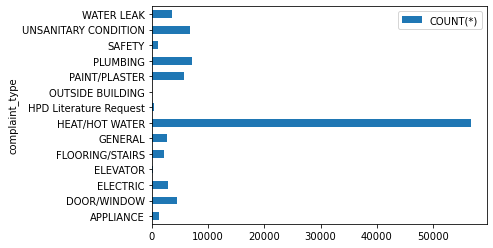

In [10]:
# Create query to get call counts by complaint_type
query = """
SELECT complaint_type, 
     COUNT(*)
  FROM hpd311calls
  GROUP BY complaint_type;
"""

# Create dataframe of call counts by issue
calls_by_issue = pd.read_sql(query, engine)

# Graph the number of calls for each housing issue
calls_by_issue.plot.barh(x="complaint_type")
plt.show()

- Create a query to pass to read_sql() that will get months and the MAX value of tmax by monthfrom weather.

In [11]:
# Create a query to get month and max tmax by month
query = """
SELECT month , 
       MAX(tmax)
  FROM weather 
  GROUP BY month;"""

# Get dataframe of monthly weather stats
weather_by_month = pd.read_sql(query, engine)

# View weather stats by month
print(weather_by_month)

      month  MAX(tmax)
0  December         61
1  February         78
2   January         61
3     March         62


- Modify the query to also get the MIN tmin value for each month.

In [12]:
# Create a query to get month, max tmax, and min tmin by month
query = """
SELECT month, 
	   MAX(tmax), 
       MIN(tmin)
  FROM weather 
 GROUP BY month;
"""

# Get dataframe of monthly weather stats
weather_by_month = pd.read_sql(query, engine)

# View weather stats by month
print(weather_by_month)

      month  MAX(tmax)  MIN(tmin)
0  December         61          9
1  February         78         16
2   January         61          5
3     March         62         27


- Modify the query to also get the total precipitation (prcp) for each month.

In [13]:
# Create query to get temperature and precipitation by month
query = """
SELECT month, 
        MAX(tmax), 
        MIN(tmin),
        SUM(prcp)
  FROM weather 
 GROUP BY month;
"""

# Get dataframe of monthly weather stats
weather_by_month = pd.read_sql(query, engine)

# View weather stats by month
print(weather_by_month)

      month  MAX(tmax)  MIN(tmin)  SUM(prcp)
0  December         61          9       2.21
1  February         78         16       5.83
2   January         61          5       2.18
3     March         62         27       5.17


- Complete the query to join weather to hpd311calls by their date and created_date columns, respectively.
- Query the database and assign the resulting dataframe to calls_with_weather.
- Print the first few rows of calls_with_weather to confirm all columns were joined.

In [14]:
# Query to join weather to call records by date columns
query = """
SELECT * 
  FROM hpd311calls
  JOIN weather 
  ON hpd311calls.created_date = weather.date;
"""

# Create dataframe of joined tables
calls_with_weather = pd.read_sql(query, engine)

# View the dataframe to make sure all columns were joined
print(calls_with_weather.head())

  unique_key created_date agency  complaint_type incident_zip  \
0   38070822   01/01/2018    HPD  HEAT/HOT WATER        10468   
1   38065299   01/01/2018    HPD        PLUMBING        10003   
2   38066653   01/01/2018    HPD  HEAT/HOT WATER        10452   
3   38070264   01/01/2018    HPD  HEAT/HOT WATER        10032   
4   38072466   01/01/2018    HPD  HEAT/HOT WATER        11213   

       incident_address community_board    borough      station  \
0    2786 JEROME AVENUE        07 BRONX      BRONX  USW00094728   
1  323 EAST   12 STREET    03 MANHATTAN  MANHATTAN  USW00094728   
2  1235 GRAND CONCOURSE        04 BRONX      BRONX  USW00094728   
3  656 WEST  171 STREET    12 MANHATTAN  MANHATTAN  USW00094728   
4       1030 PARK PLACE     08 BROOKLYN   BROOKLYN  USW00094728   

                          name  ...  longitude  elevation        date  \
0  NY CITY CENTRAL PARK, NY US  ...  -73.96925       42.7  01/01/2018   
1  NY CITY CENTRAL PARK, NY US  ...  -73.96925       42.7  0

- Complete query to get the prcp column in weather and join weather to hpd311calls on their date and created_date columns, respectively.
- Use read_sql() to load the results of the query into the leak_calls dataframe.

In [15]:
# Query to get hpd311calls and precipitation values
query = """
SELECT hpd311calls.*, weather.prcp
  FROM hpd311calls
  JOIN weather
  ON hpd311calls.created_date =  weather.date;"""

# Load query results into the leak_calls dataframe
leak_calls = pd.read_sql(query, engine)

# View the dataframe
print(leak_calls.head())

  unique_key created_date agency  complaint_type incident_zip  \
0   38070822   01/01/2018    HPD  HEAT/HOT WATER        10468   
1   38065299   01/01/2018    HPD        PLUMBING        10003   
2   38066653   01/01/2018    HPD  HEAT/HOT WATER        10452   
3   38070264   01/01/2018    HPD  HEAT/HOT WATER        10032   
4   38072466   01/01/2018    HPD  HEAT/HOT WATER        11213   

       incident_address community_board    borough  prcp  
0    2786 JEROME AVENUE        07 BRONX      BRONX   0.0  
1  323 EAST   12 STREET    03 MANHATTAN  MANHATTAN   0.0  
2  1235 GRAND CONCOURSE        04 BRONX      BRONX   0.0  
3  656 WEST  171 STREET    12 MANHATTAN  MANHATTAN   0.0  
4       1030 PARK PLACE     08 BROOKLYN   BROOKLYN   0.0  


- Modify query to get only rows that have 'WATER LEAK' as their complaint_type.

In [16]:
# Query to get water leak calls and daily precipitation
query = """
SELECT hpd311calls.*, weather.prcp
  FROM hpd311calls
  JOIN weather
    ON hpd311calls.created_date = weather.date
  WHERE hpd311calls.complaint_type = 'WATER LEAK';"""

# Load query results into the leak_calls dataframe
leak_calls = pd.read_sql(query, engine)

# View the dataframe
print(leak_calls.head())

  unique_key created_date agency complaint_type incident_zip  \
0   38074305   01/01/2018    HPD     WATER LEAK        11212   
1   38078748   01/01/2018    HPD     WATER LEAK        10458   
2   38081097   01/01/2018    HPD     WATER LEAK        11221   
3   38077874   01/01/2018    HPD     WATER LEAK        11418   
4   38081110   01/01/2018    HPD     WATER LEAK        11420   

          incident_address community_board   borough  prcp  
0     1026 WILLMOHR STREET     17 BROOKLYN  BROOKLYN   0.0  
1       2700 MARION AVENUE        07 BRONX     BRONX   0.0  
2  192 MALCOLM X BOULEVARD     03 BROOKLYN  BROOKLYN   0.0  
3    129-11 JAMAICA AVENUE       09 QUEENS    QUEENS   0.0  
4        111-17 133 STREET       10 QUEENS    QUEENS   0.0  


- Complete the query to get created_date and counts of records whose complaint_type is HEAT/HOT WATER from hpd311calls by date.
- Create a dataframe,df, containing the results of the query.

In [17]:
# Query to get heat/hot water call counts by created_date
query = """
SELECT hpd311calls.created_date, 
       COUNT(*)
  FROM hpd311calls 
  WHERE hpd311calls.complaint_type = 'HEAT/HOT WATER'
  GROUP BY hpd311calls.created_date;
"""

# Query database and save results as df
df = pd.read_sql(query, engine)

# View first 5 records
print(df.head())

  created_date  COUNT(*)
0   01/01/2018      4597
1   01/02/2018      4362
2   01/03/2018      3045
3   01/04/2018      3374
4   01/05/2018      4333


- Modify the query to join tmax and tmin from the weather table. (There is only one record per date in weather, so we do not need SQL's MAX and MIN functions here.) Join the tables on created_date in hpd311calls and date in weather.

In [18]:
# Modify query to join tmax and tmin from weather by date
query = """
SELECT hpd311calls.created_date, 
	   COUNT(*), 
       weather.tmax,
       weather.tmin
  FROM hpd311calls 
       JOIN weather
       ON hpd311calls.created_date = weather.date
 WHERE hpd311calls.complaint_type = 'HEAT/HOT WATER' 
 GROUP BY hpd311calls.created_date;
 """

# Query database and save results as df
df = pd.read_sql(query, engine)

# View first 5 records
print(df.head())

  created_date  COUNT(*)  tmax  tmin
0   01/01/2018      4597    19     7
1   01/02/2018      4362    26    13
2   01/03/2018      3045    30    16
3   01/04/2018      3374    29    19
4   01/05/2018      4333    19     9
